# LangChain - Legacy Chains and Memory
* Notebook by Adam Lang
* Date: 7/31/2024

# Overview
* We will review the various types of Legacy chains and memory infrastructure and use cases in LangChain as well as implementation, including the following:
1. What is a LangChain Chain?
2. LangChain Legacy Chains
3. Popular Legacy Chains
4. LangChain Expression Language - LCEL Chains
5. Popular Built-in LCEL Chains
6. Advantages of LCEL Chains

# Code Implementation
* In this notebook I am going to focus on the legacy chains for a simple LLM chain and a sequential LLM chain.
* In notebooks to follow we will breakdown how to do this in a more efficent manner using the newest LCL syntax.




## LangChain Legacy Chains
* A chain is basically a sequence or pipeline of steps.
* These steps are typically API calls in LangChain:
1. Calling an LLM
2. Calling a tool
3. Calling a retriever
4. Calling a preprocessing operation

Architecture

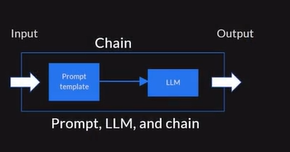

* input is typically a prompt.
* Data supplied into prompt template
* Sent to LLM
* Output

### Legacy Chains Important notes
* Prior to August 2023, there was a differente syntax for calling LLM Chains.
* LangChain now calls these "legacy chains".
* Newer syntax is built using the LCEL or LangChain Expression Language.
* Not all legacy chains have been converted over to LCEL syntax and formatting.
* Legacy chains are constructed by subclassing from a legacy chain class.
   * They do not use LCEL but have their own implementation logic.
   * Many of them are being deprecated so check langchain docs.
   * Some are still used....because no LCEL variant yet.

* Some standard legacy chains:
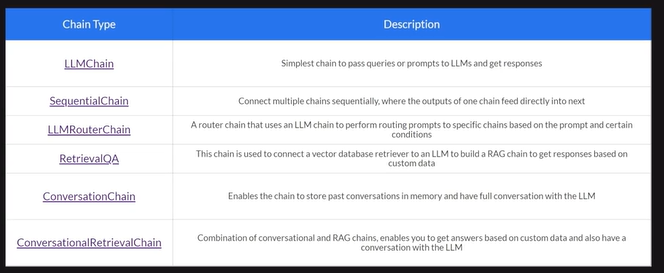



## LCEL - LangChain Expression Language
* LCEL is a declarative way to link chains together.
* Has quickly become the go-to standard to build complex LLM pipelines or chains.
* Recommended officially by LangChain when building LLM apps.

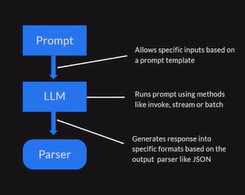

* LCEL allows you to easily chain multiple steps using the vertical bar or pipe operator "|"
* Example 3 step LCEL chain from above:
   * `chain = Prompt | LLM | Parser`
   * This tells us the prompt flows into the LLM --> generates response --> formatted by output parser

* Common Built-in LCEL Chains

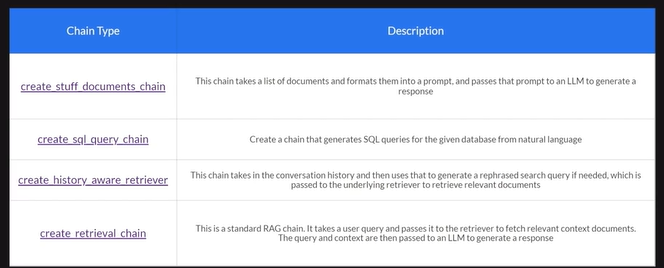

## Custom LCEL Chains
* Any custom LCEL chain can be built by stacking runnables with the pipe "|" operator.
* Popular chains we will look at:
1. LLM Chain
2. Conversation chain
3. QA RAG Chain
* We can also look at and experiment with more complex chains with RAG systems.

## LCEL Advantages
1. **Streaming Support**
  * Chunks of response tokens with low latency and stream responses live to user.
2. **Async Support and parallel execution**
  * LCEL chains have support for async APIs to handle many concurrent requests in same server.
  * You are also able to execute certain steps in parallel.

3. **Deployment, monitoring, observability**
  * LCEL chains can be deployed easily with **LangServe**.
  * They allow you to access results of intermediate steps.
  * Log them using LangSmith for observability, debug, monitor.

4. **Input and Output Schemas**
  * LCEL chains have capabilities to validate inputs and outputs based on specific schemas.

# Implementation of Chains
1. Simple Chain
2. Sequential Chain (multiple LLM chains together)


## Dependencies

In [1]:
!pip install langchain==0.2.0
!pip install langchain-openai==0.1.7
!pip install langchain-community==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.6/377.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00


## Enter OpenAI key


In [2]:
from getpass import getpass

OPENAI_KEY = getpass('Enter openai key: ')

Enter openai key: ··········


In [3]:
## environment vars
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## LLM Connection
* Here we will use ChatGPT

In [4]:
from langchain_openai import ChatOpenAI

# setup LLM
chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

## Legacy Chain Examples
* `LLMChain` is most popular.
  * Creates PromptTemplate and language model.
  * Formats prompt template using input key.
  * Passes format to LLM.
  * `LLMChain` has been deprecated by LangChain in favor of LCEL.

### Data - Customer Reviews of products

In [5]:
reviews = [
    f"""
    Purchased this adorable koala plush toy for my nephew's birthday,
    and he's absolutely smitten with it, carrying it around everywhere he goes.
    The plush is incredibly soft, and the koala's face has an endearing expression.
    However, I did find it a tad on the smaller side given its price point.
    I believe there may be larger alternatives available at a similar price.
    To my delight, it arrived a day earlier than anticipated,
    allowing me to enjoy it briefly before gifting it to him.
    """,
    f"""
    Required a stylish lamp for my office space, and this particular one
    came with added storage at a reasonable price.
    The delivery was surprisingly quick, arriving within just two days.
    However, the pull string for the lamp suffered damage during transit.
    To my relief, the company promptly dispatched a replacement,
    which arrived within a few days. Assembly was a breeze.
    Then, I encountered an issue with a missing component,
    but their support team responded swiftly and provided the missing part.
    It appears to be a commendable company that genuinely values its
    customers and the quality of its products.
    """
    ]

In [6]:
## legacy chain setup
from langchain.chains import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# prompt
prompt = """
            You are an expert product review analyst.
            Your task is to generate a short summary of a product
            review from an e-commerce site.

            Generate a summary of the review, maximum of 2 lines.
            Also, show both the positives and negatives from the review with maximum of 2 bullet points."""


# prompt template
prompt_template = ChatPromptTemplate.from_template(prompt)

# llm_chain
llm_chain = LLMChain(llm=chatgpt,
                     prompt=prompt_template)





/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [7]:
# get result --> invoke
result = llm_chain.invoke({'review': reviews[0]})

In [8]:
# print result
result

{'review': "\n    Purchased this adorable koala plush toy for my nephew's birthday,\n    and he's absolutely smitten with it, carrying it around everywhere he goes.\n    The plush is incredibly soft, and the koala's face has an endearing expression.\n    However, I did find it a tad on the smaller side given its price point.\n    I believe there may be larger alternatives available at a similar price.\n    To my delight, it arrived a day earlier than anticipated,\n    allowing me to enjoy it briefly before gifting it to him.\n    ",
 'text': 'Review Summary:\n"Great product with excellent performance, but the design could be improved."\n\nPositives:\n- Excellent performance\n- Good value for money\n\nNegatives:\n- Design could be better\n- Some durability concerns'}

In [9]:
# print result text
print(result['text'])

Review Summary:
"Great product with excellent performance, but the design could be improved."

Positives:
- Excellent performance
- Good value for money

Negatives:
- Design could be better
- Some durability concerns


In [10]:
## multiple reviews - map invoke
formatted_reviews = [{'review': review}
                     for review in reviews]

results = llm_chain.map().invoke(formatted_reviews)
len(results)

2

In [11]:
# view formatted results with loop
for result in results:
  print(result['text'])
  print()

Review Summary:
"Great product overall, but had some issues with durability."

Positives:
- Excellent performance and features
- Easy to use and set up

Negatives:
- Durability issues reported by some users
- Price may be a bit high for some customers

Summary:
The product received mixed reviews with some customers praising its durability while others criticized its high price point.

Positives:
- Durable construction
- Stylish design

Negatives:
- High price
- Limited color options



## Combine multiple tasks with `SequentialChain` (legacy chain)
* Takes input from 1 chain and sends it to another in a pipeline.

Here given a few IT Support issues, for each customer issue:
- We want to detect the customer message language
- We want to translate the customer message from the source language to English
- We want the AI to generate a suitable response to the problem in English
- We want to translate this response to the customer language

In [12]:
# it support issues in different languages
it_support_queue = [
    "I can't access my email. It keeps showing an error message. Please help.",
    "Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor?",
    "Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer.",
    "我无法访问公司的网站。每次都显示错误信息。请帮忙解决。"
]

it_support_queue

["I can't access my email. It keeps showing an error message. Please help.",
 'Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor?',
 "Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer.",
 '我无法访问公司的网站。每次都显示错误信息。请帮忙解决。']

Now we can use `SequentialChain` to setup a pipeline of each individual task above step by step.

**Note**
* The chains below are each individual chains, however, they are sequential.

In [14]:
# Chain 1: Detect customer message language
prompt1 = """
          You are an experienced customer support agent.
          For the given customer support messages delimited below in triple backticks,
          Please output the language of the message in one word only, for example "Spanish".
          """

prompt_template1 = ChatPromptTemplate.from_template(prompt1)
chain1 = LLMChain(llm=chatgpt, prompt=prompt_template1, output_key='orig_lang')

# Chain 2: Translate customer message to english - using logic
prompt2 = """
         You are an experienced customer support agent.
         For the customer message and customer message language delimited below by triple backticks,
         Translate the customer message from the customer message language to English.
         If the customer message language is not in English,
         else return back the original customer message.

         Customer Message:
         '''{orig_msg}'''
         Customer Message Language:
         '''{orig_lang}'''
         """

# second prompt template
prompt_template2 = ChatPromptTemplate.from_template(prompt2)
chain2 = LLMChain(llm=chatgpt, prompt=prompt_template2, output_key='trans_msg')


# Chain 3: Generate a resolution response in English
prompt3 = """
          You are an experienced customer support agent.
          For the customer support messages below delimited by triple backticks,
          Generate an appropriate resolution response in English.

          Customer Message:
          '''{trans_msg}'''
          """

# third prompt template
prompt_template3 = ChatPromptTemplate.from_template(prompt3)
chain3 = LLMChain(llm=chatgpt, prompt=prompt_template3, output_key='trans_response')

# Chain 4: Translate resolution response from English to Customer's language
prompt4 = """
          You are an experiences customer support agent.
          For the customer resolution response and target language delimited below by triple backticks,
          Translate the customer resolution response message from English to the target language.
          if target language is not in English,
          else return back the original customer resolution response.

          Customer Resolution Response:
          '''{trans_response}'''
          Target Language:
          '''{orig_lang}'''
          """
prompt_template4 = ChatPromptTemplate.from_template(prompt4)
chain4 = LLMChain(llm=chatgpt, prompt=prompt_template4, output_key="response")


Summary
* So far we have built 4 individual or separate legacy chains.
* We now want to link them together in a pipeline to perform their separate tasks in sequential order.

In [16]:
from langchain.chains import SequentialChain

# combine all chains sequentially
seq_chain = SequentialChain(
    chains=[chain1, chain2, chain3, chain4],
    input_variables=['orig_msg'], #input data
    output_variables=['orig_msg', 'orig_lang', 'trans_msg','response', 'trans_response'], # response data
    verbose=True #set to false to turn off debugging messages
)

In [17]:
# format messages
support_msgs_formatted = [{'orig_msg': msg} for msg in it_support_queue]
support_msgs_formatted

[{'orig_msg': "I can't access my email. It keeps showing an error message. Please help."},
 {'orig_msg': 'Tengo problemas con la VPN. No puedo conectarme a la red de la empresa. ¿Pueden ayudarme, por favor?'},
 {'orig_msg': "Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer."},
 {'orig_msg': '我无法访问公司的网站。每次都显示错误信息。请帮忙解决。'}]

In [18]:
# now invoke the chain on all support messages
results = seq_chain.map().invoke(support_msgs_formatted)



> Entering new SequentialChain chain...


> Entering new SequentialChain chain...


> Entering new SequentialChain chain...


> Entering new SequentialChain chain...

> Finished chain.

> Finished chain.

> Finished chain.

> Finished chain.


In [19]:
# results for index [2]
results[2]

{'orig_msg': "Mon imprimante ne répond pas et n'imprime plus. J'ai besoin d'aide pour la réparer.",
 'orig_lang': '```\nHola, necesito ayuda con mi pedido.\n```\nSpanish',
 'trans_msg': 'Customer Message:\n         My printer is not responding and not printing anymore. I need help to fix it.',
 'response': '```Resolution:\nLo siento mucho escuchar que estás teniendo problemas con tu impresora. Para solucionar este problema, por favor intenta los siguientes pasos:\n1. Verifica si la impresora está correctamente conectada a la fuente de alimentación y encendida.\n2. Asegúrate de que haya suficiente papel en la bandeja de la impresora y que no haya atascos de papel.\n3. Reinicia la impresora y tu computadora.\n4. Verifica si los controladores de la impresora están actualizados.\nSi el problema persiste después de intentar estos pasos, por favor avísanos para que podamos ayudarte aún más.```',
 'trans_response': "Resolution:\nI'm sorry to hear that you're experiencing issues with your prin

Summary:
* Above we can see the original message was in French, and the final output is the translated response in English.

In [20]:
## finally we can format this in pandas df
import pandas as pd

df = pd.DataFrame(results)
df

,orig_msg,orig_lang,trans_msg,response,trans_response
0,I can't access my email. It keeps showing an e...,"```\nHola, necesito ayuda con mi pedido.\n```","Hello, I need help with my order.","Resolution:\nHello, thank you for reaching out...","Resolution:\nHello, thank you for reaching out..."
1,Tengo problemas con la VPN. No puedo conectarm...,"```\nHola, necesito ayuda con mi pedido.\n```\...","Customer Message:\n ""I have problems w...","Hola, necesito ayuda con mi pedido.",Resolution:\nHello! Thank you for reaching out...
2,Mon imprimante ne répond pas et n'imprime plus...,"```\nHola, necesito ayuda con mi pedido.\n```\...",Customer Message:\n My printer is not ...,```Resolution:\nLo siento mucho escuchar que e...,Resolution:\nI'm sorry to hear that you're exp...
3,我无法访问公司的网站。每次都显示错误信息。请帮忙解决。,"```\nHola, necesito ayuda con mi pedido.\n```\...",I cannot access the company's website. It alwa...,```\nResolution Response:\nI apologize for the...,Resolution Response:\n I apologize fo...


There are many other popular Legacy Chains including:
* `ConversationChain`
* `ConversationalRetrievalChain`
* `RetrievalQA`

However, being that LangChain now focuses on using the more intuitive LCEL Chains, we don't need to show how to use them as they are now deprecated.

# Summary
* In this notebook we went over a basic review of legacy and the newer LCEL chains in Langchain.
* We implemented a legacy simple LLM chain as well as a legacy sequential chain.
* In the next series of notebooks I am going to go over how to do this in a more simpler, efficient and intuitive fashion using the LCEL syntax.